# Financial Planning: Linear Programing Case

- we describe an application of linear programming to minimize the cost of satisfying a company’s obligations to its early retirement program. Hewlitt Corporation established an early retirement program as part of its corporate restructuring. At the close of the voluntary sign-up period, 68 employees had elected early retirement. As a result of these early retirements, the company incurs the following obligations over the next eight years:

| Year | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
|------|-----|-----|-----|-----|-----|-----|-----|-----|
| Cash Requirement ($'000) | 430 | 210 | 222 | 231 | 240 | 195 | 225 | 255 |

- The corporate treasurer must determine how much money must be set aside today to meet the eight yearly financial obligations as they come due. The financing plan for the retirement program includes investments in government bonds as well as savings. The investments in government bonds are limited to three choices:

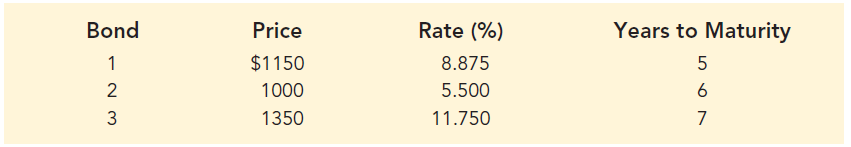

- The government bonds have a par value of US1,000, which means that even with different prices, each bond pays US1,000 at maturity. The rates shown are based on the par value. For purposes of planning, the treasurer assumed that any funds not invested in bonds will be placed in savings and earn interest at an annual rate of 4%.

We define the decision variables as follows:

- \( F \) = total dollars required to meet the retirement plan's eight-year obligation
- \( B_1 \) = units of bond 1 purchased at the beginning of year 1
- \( B_2 \) = units of bond 2 purchased at the beginning of year 1
- \( B_3 \) = units of bond 3 purchased at the beginning of year 1
- \( S_i \) = amount placed in savings at the beginning of year \( i \) for \( i = 1 to  8 \)


In [1]:
from scipy.optimize import linprog

# Coefficients of the decision variables in the objective function
# Objective is to minimize F, so it has a coefficient of 1.
# All other variables (B1, B2, B3, S1, ..., S8) have a coefficient of 0 in the objective function
c = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Coefficients for the constraints
A_eq = [
    # Year 1
    [1, -1.15, -1, -1.35, -1, 0, 0, 0, 0, 0, 0, 0],
    # Year 2
    [0, 0.08875, 0.055, 0.1175, 1.04, -1, 0, 0, 0, 0, 0, 0],
    # Year 3
    [0, 0.08875, 0.055, 0.1175, 0, 1.04, -1, 0, 0, 0, 0, 0],
    # Year 4
    [0, 0.08875, 0.055, 0.1175, 0, 0, 1.04, -1, 0, 0, 0, 0],
    # Year 5
    [0, 0.08875, 0.055, 0.1175, 0, 0, 0, 1.04, -1, 0, 0, 0],
    # Year 6
    [0, 1.08875, 0.055, 0.1175, 0, 0, 0, 0, 1.04, -1, 0, 0],
    # Year 7
    [0, 0, 1.055, 0.1175, 0, 0, 0, 0, 0, 1.04, -1, 0],
    # Year 8
    [0, 0, 0, 1.1175, 0, 0, 0, 0, 0, 0, 1.04, -1]
]

# Right-hand side of the equations
b_eq = [430, 210, 222, 231, 240, 195, 225, 255]

# Bounds for each variable (all variables must be non-negative)
bounds = [(0, None) for _ in range(12)]

# Solving the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 1728.7938549412033
              x: [ 1.729e+03  1.450e+02  1.879e+02  2.282e+02  6.361e+02
                   5.016e+02  3.497e+02  1.827e+02  0.000e+00  0.000e+00
                   0.000e+00  0.000e+00]
            nit: 7
          lower:  residual: [ 1.729e+03  1.450e+02  1.879e+02  2.282e+02
                              6.361e+02  5.016e+02  3.497e+02  1.827e+02
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              6.403e-02  1.261e-02  2.132e-02  6.708e-01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf        inf

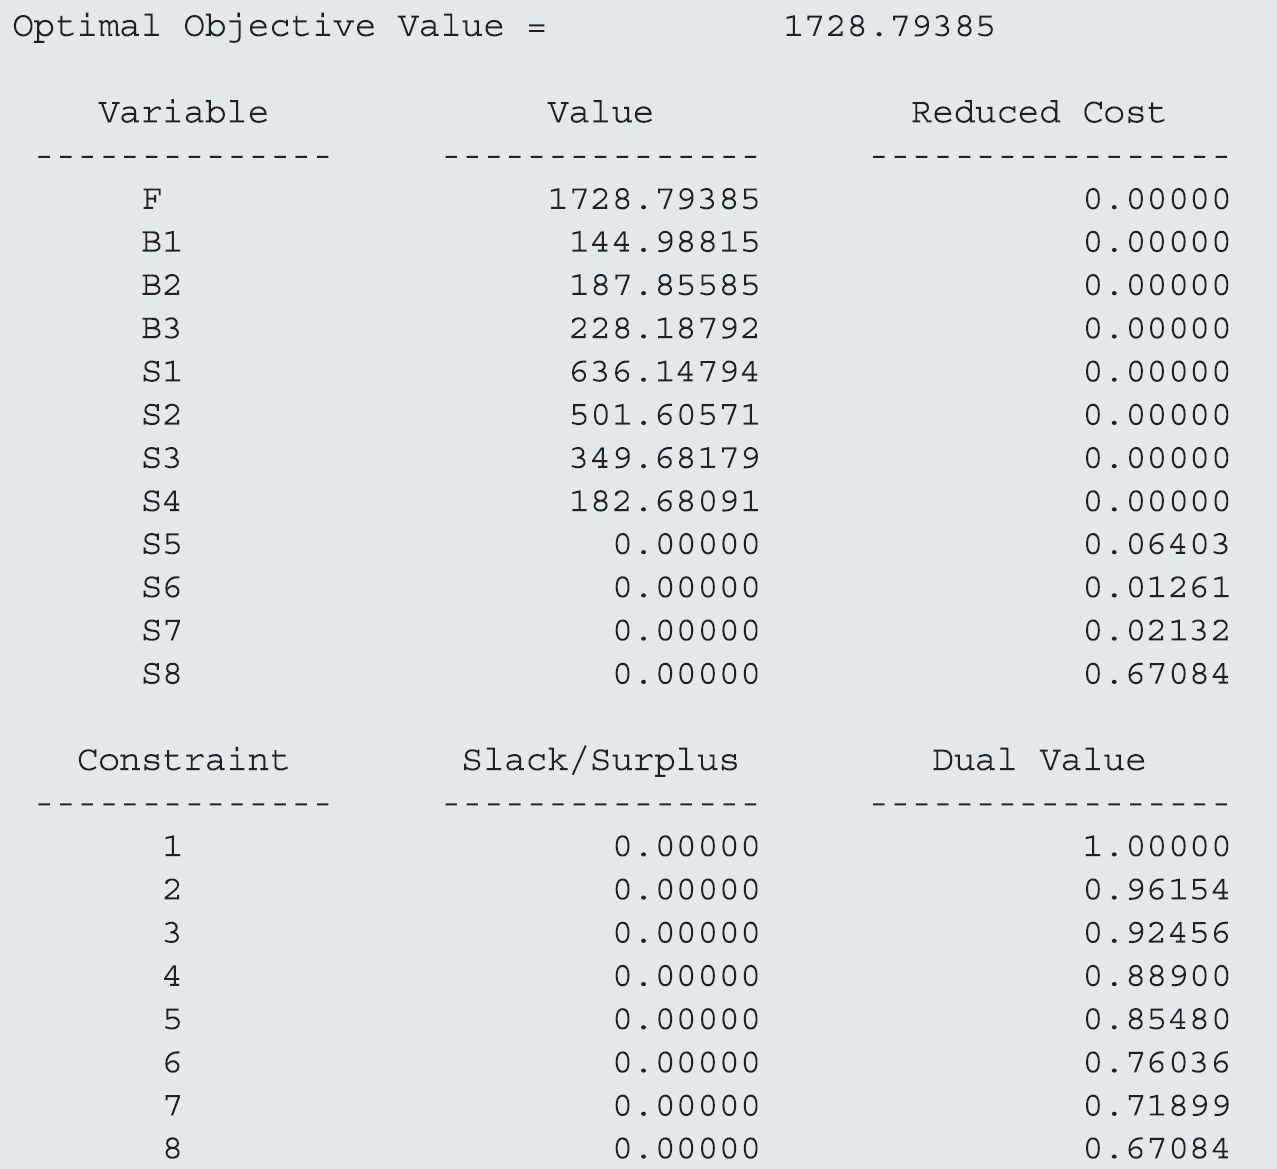

In [2]:
# Formatting the result for better readability
formatted_result = {
    "Total dollars required upfront (F)": round(result.x[0], 2)*1000,
    "Units of bond 1 purchased (B1)": round(result.x[1], 2),
    "Total dollars invested in bond 1": round(result.x[1], 2)*1150,
    "Units of bond 2 purchased (B2)": round(result.x[2], 2),
    "Total dollars invested in bond 2": round(result.x[2], 2)*1000,
    "Units of bond 3 purchased (B3)": round(result.x[3], 2),
     "Total dollars invested in bond 3": round(result.x[3], 2)*1350,
    "Amount in savings at start of year 1 (S1)": round(result.x[4], 2),
    "Amount in savings at start of year 2 (S2)": round(result.x[5], 2),
    "Amount in savings at start of year 3 (S3)": round(result.x[6], 2),
    "Amount in savings at start of year 4 (S4)": round(result.x[7], 2),
    "Amount in savings at start of year 5 to 8 (S5 to S8)": round(result.x[8], 2)
}

formatted_result

{'Total dollars required upfront (F)': 1728790.0,
 'Units of bond 1 purchased (B1)': 144.99,
 'Total dollars invested in bond 1': 166738.5,
 'Units of bond 2 purchased (B2)': 187.86,
 'Total dollars invested in bond 2': 187860.0,
 'Units of bond 3 purchased (B3)': 228.19,
 'Total dollars invested in bond 3': 308056.5,
 'Amount in savings at start of year 1 (S1)': 636.15,
 'Amount in savings at start of year 2 (S2)': 501.61,
 'Amount in savings at start of year 3 (S3)': 349.68,
 'Amount in savings at start of year 4 (S4)': 182.68,
 'Amount in savings at start of year 5 to 8 (S5 to S8)': 0.0}

# Solution Interpretation

- Objective function value of 1728.79385 implies that, the total investment required to meet the retirement plan’s eight-year obligation is USD 1,728,794.
- Using the current prices of USD 1150, USD 1000, and USD 1350 for each of the bonds, respectively, we can summarize the initial investments in the three bonds as follows:

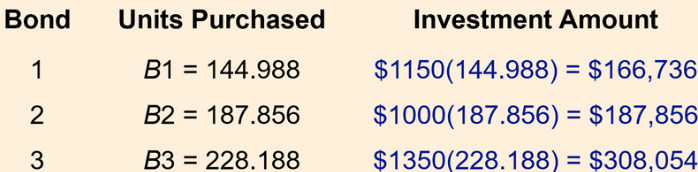

- The optimal solution also shows that USD 636,148 (see variable S1) will be placed in savings at the beginning of the first year. 
- Additional investments of USD 501,606, USD 349,682, and USD 182,681 are required at the beginning of years 2 to 4 (see variables S2, S3, and S4)
- Interest income from the bonds plus the bond maturity incomes will be sufficient to cover the retirement program’s cash requirements in years 5 through 8

- The dual values indicate that increasing the required payment in any year by USD 1000 would increase the total funds required for the retirement program’s obligation by USD 1000 times the dual value. 
- Note how the dual values show that increases in required payments in the early years have the largest impact. This makes sense in that there is little time to build up investment income in the early years versus the subsequent years. 
- This suggests that if Hewlitt faces increases in required payments it would benefit by deferring those increases to later years if possible.